# Домашнее задание 2

Всем привет! Добро пожаловать в домашнее задание 2 😊 Перед выполнением просим прочитать [вот эту статью](https://habr.com/ru/company/ods/blog/322626/).

Главная Ваша задача – исследовать данные, найти как можно больше интересных гипотез! Можно действовать по шагам с наших вебинаров и статьи, можно по статье выше. Постарайтесь использовать методы, изученные за эти 2 недели.

Ниже примерный план, по которому можно идти. Его можно и нужно дополнять 👌

Загрузим данные: 

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('data/pokemon.csv')
df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0      Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1        Ivysaur  Grass  Poison  60      62       63       80       80     60   
2       Venusaur  Grass  Poison  80      82       83      100      100     80   
3  Mega Venusaur  Grass  Poison  80     100      123      122      120     80   
4     Charmander   Fire     NaN  39      52       43       60       50     65   

   Generation  Legendary  
0           1      False  
1           1      False  
2           1      False  
3           1      False  
4           1      False

Сколько всего у нас строчек и колонок в таблице?

In [9]:
df.shape

(800, 11)

Используйте метод `describe()`. По дефолту он выдаст статистики для числовых объектов. Используйте `df.describe(include=['object'])` для колонок с текстом. Сделайте выводы и напишите их прямо в этом ноутбуке текстом.

In [54]:
df.describe(include=['object'])

Name Type 1  Type 2
count      799    800     414
unique     799     18      18
top     Skitty  Water  Flying
freq         1    112      97

Из данных можем понять что поле Name для всех объектов уникально, что всего существует 18 уникальных типов покемонов. Самый частый тип покемонов - водный, встречается 112 раз. Так же можно заметить что в колонке Name пропущенно одно имя покемона, а в колонке Type 2 пропущено 386 значений.

In [59]:
sum(df['Type 1'] == 'Water')

112

Есть ли у нас пропуски в данных? Если есть, то для числовых колонок заполните их среднем, для текстовых каким нибудь словом "missing".

<details><summary>Подсказка 1 для поиска пропусков</summary>
<p>

* Используйте функцию `df.isna().sum()`

</p>
</details>

<details><summary>Подсказка 2 для заполнения</summary>
<p>

* [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) – тыкните, изучите документацию, используйте:)

</p>
</details>

In [13]:
df.isna().sum()

Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Есть пропуск в колонке Name и 386 пропусков в колонке Type 2

In [12]:

values = {'Name': 'Missing', 'Type 2':'Missing'}
df.fillna(value=values)


Name   Type 1   Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0         Bulbasaur    Grass   Poison  45      49       49       65       65   
1           Ivysaur    Grass   Poison  60      62       63       80       80   
2          Venusaur    Grass   Poison  80      82       83      100      100   
3     Mega Venusaur    Grass   Poison  80     100      123      122      120   
4        Charmander     Fire  Missing  39      52       43       60       50   
..              ...      ...      ...  ..     ...      ...      ...      ...   
795         Diancie     Rock    Fairy  50     100      150      100      150   
796    Mega Diancie     Rock    Fairy  50     160      110      160      110   
797  Hoopa Confined  Psychic    Ghost  80     110       60      150      130   
798   Hoopa Unbound  Psychic     Dark  80     160       60      170      130   
799       Volcanion     Fire    Water  80     110      120      130       90   

     Speed  Generation  Legendary  
0       45           1      False  
1       60           1      False  
2       80           1      False  
3       80           1      False  
4       65           1      False  
..     ...         ...        ...  
795     50           6       True  
796    110           6       True  
797     70           6       True  
798     80           6       True  
799     70           6       True  

[800 rows x 11 columns]

Посчитайте средние, медианные, минимальные и максимальные значения `'Speed'` по типу `'Type 1'`, потом по типу `'Type 2'`. 

<details><summary>Подсказка 1</summary>
<p>

* Это про `groupby()`

</p>
</details>

<details><summary>Подсказка 2</summary>
<p>

* Вспомните, как на одном из вебинаров мы писали `df.groupby('Column')['Column 2'].agg('min', 'max', 'mean', 'median')`. Почитать подробнее [можно тут](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html)
    

</p>
</details>

In [26]:
df2 = df.groupby(['Type 1', 'Type 2'])['Speed'].agg(['mean', 'min', 'max', 'median'])
df2

mean  min  max  median
Type 1 Type 2                               
Bug    Electric  86.500000   65  108    86.5
       Fighting  80.000000   75   85    80.0
       Fire      80.000000   60  100    80.0
       Flying    82.857143   40  160    77.5
       Ghost     40.000000   40   40    40.0
...                    ...  ...  ...     ...
Water  Ice       66.666667   60   70    70.0
       Poison    85.000000   70  100    85.0
       Psychic   44.000000   15  115    30.0
       Rock      36.000000   22   55    33.5
       Steel     60.000000   60   60    60.0

[136 rows x 4 columns]

Нарисуйте на одном графике гистограммы по колонкам `Attack` и `Defense`. 

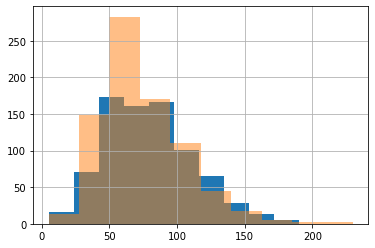

In [34]:
x = df['Attack'].hist()
y = df['Defense'].hist(alpha=0.5);

Сгруппируйте по колонке `Generation`. Примените `value_counts()` к колонке `Legendary` и нарисуйте столбчатый график. Среди какого поколения больше всего легендарных покемонов?

In [49]:
df3 = df.groupby(['Generation'])['Legendary'].value_counts()
df3

Generation  Legendary
1           False        160
            True           6
2           False        101
            True           5
3           False        142
            True          18
4           False        108
            True          13
5           False        150
            True          15
6           False         74
            True           8
Name: Legendary, dtype: int64

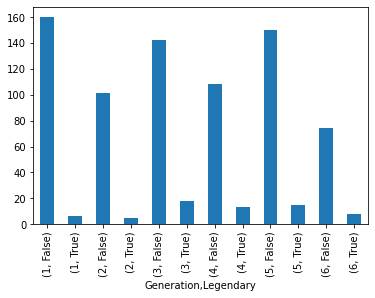

In [51]:
df3.plot(kind='bar')

Больше всего легендарных покемонов в 3м поколении - 18 штук